<a href="https://www.kaggle.com/code/dalepeh/eda-model-pipepline?scriptVersionId=119729447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdb-resale-2017-2023feb/completed_flat_price_2017_2023.csv
/kaggle/input/hdb-resale-2017-2023feb/CPI_2000to2022Feb.csv


## Import Libaries & Data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
hdb_resale = pd.read_csv('/kaggle/input/hdb-resale-2017-2023feb/completed_flat_price_2017_2023.csv')

In [4]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146872 entries, 0 to 146871
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                146872 non-null  object 
 1   town                 146872 non-null  object 
 2   flat_type            146872 non-null  object 
 3   block                146872 non-null  object 
 4   street_name          146872 non-null  object 
 5   storey_range         146872 non-null  object 
 6   floor_area_sqm       146872 non-null  float64
 7   flat_model           146872 non-null  object 
 8   lease_commence_date  146872 non-null  int64  
 9   remaining_lease      146872 non-null  object 
 10  resale_price         146872 non-null  float64
 11  full_address         146872 non-null  object 
 12  Longitude            146842 non-null  float64
 13  Latitude             146872 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 15.7+ MB


In [5]:
hdb_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987


In [6]:
cpi_housing = pd.read_csv(r'/kaggle/input/hdb-resale-2017-2023feb/CPI_2000to2022Feb.csv')

In [7]:
cpi_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tranc_Yr     278 non-null    int64  
 1   Tranc_Mth    278 non-null    object 
 2   CPI Housing  278 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [12]:
cpi_housing.tail()

,Tranc_Yr,Tranc_Mth,CPI Housing
273,2022,October,106.702
274,2022,November,108.770
275,2022,December,109.040
276,2023,January,109.290
277,2023,February,109.350


## Data Processing

### 1. Split 'month' to 'Tranc_Yr' and 'Tranc_Mth' columns

In [8]:
#Convert month to datetime and format to Month period
hdb_resale['month'] = pd.to_datetime(hdb_resale['month'])

#Get 'Tranc_Yr' and 'Tranc_Mth' columns
hdb_resale['Tranc_Yr'] = hdb_resale['month'].dt.year
hdb_resale['Tranc_Mth'] = hdb_resale['month'].dt.month_name()

### 2. Add Consumer Price Index for Housing Get Adjusted_Price

In [9]:
# Update and merge CPI
hdb_resale = pd.merge(hdb_resale, cpi_housing,left_on=['Tranc_Yr', 'Tranc_Mth'],right_on=['Tranc_Yr', 'Tranc_Mth'],how='left')

In [62]:
#Add "Adjusted-Price" calculated from CPI Housing
hdb_resale['Adjusted_Price'] =  hdb_resale['resale_price'] * (109.350 / hdb_resale['CPI Housing'])

#Round the Adjusted_Price round to nearest thousand
hdb_resale['Adjusted_Price'] =hdb_resale.Adjusted_Price.round(-2)

In [63]:
hdb_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,Latitude,Tranc_Yr,Tranc_Mth,CPI Housing,Adjusted_Price,remaining_yr,lower_flr,higher_flr,median_flr,Distance_from_CBD
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,1.369941,2017,January,106.614,238000.0,61.333333,10,12,11,9.662606
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,1.379242,2017,January,106.614,256400.0,60.583333,01,03,2,10.728107
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,1.380760,2017,January,106.614,268700.0,62.416667,01,03,2,10.959149
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,1.366223,2017,January,106.614,271800.0,62.083333,04,06,5,9.254080
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,1.380987,2017,January,106.614,271800.0,62.416667,01,03,2,10.989954


### 3. Split 'years' to 'remaining_yr' and 'remaining_month' columns

In [64]:
#split remaining_lease into year and month columns
hdb_resale[['remaining_yr','remaining_month']] = hdb_resale.remaining_lease.str.split("years ", expand=True)

#remove the word 'years' and empty spaces
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'].replace({r'\byears?\b': '', ' ': ''}, regex=True)

#delete 'months' and empty spaces in remaining_month
hdb_resale['remaining_month'] = hdb_resale['remaining_month'].replace({r'\bmonths?\b': '', ' ': ''}, regex=True)

In [45]:
# list values of remaining_month
hdb_resale.remaining_month.unique()

array(['04', '07', '05', '01', None, '06', '08', '10', '03', '09', '11',
       '02', '0'], dtype=object)

In [65]:
#fill null values with 0
hdb_resale['remaining_month'] = hdb_resale.remaining_month.fillna(0)

#convert remaining_yr to integer
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'].astype(int)

#convert remaining_month to integer
hdb_resale['remaining_month'] = hdb_resale['remaining_month'].astype(int)

#turn remaining month /12 to get decimal
hdb_resale['remaining_month'] = hdb_resale['remaining_month'] / 12

#change compute remaining_year by adding remaining_month
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'] + hdb_resale['remaining_month']

#drop remaining_month
hdb_resale.drop('remaining_month', axis = 1, inplace=True)

In [66]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146872 entries, 0 to 146871
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                146872 non-null  datetime64[ns]
 1   town                 146872 non-null  object        
 2   flat_type            146872 non-null  object        
 3   block                146872 non-null  object        
 4   street_name          146872 non-null  object        
 5   storey_range         146872 non-null  object        
 6   floor_area_sqm       146872 non-null  float64       
 7   flat_model           146872 non-null  object        
 8   lease_commence_date  146872 non-null  int64         
 9   remaining_lease      146872 non-null  object        
 10  resale_price         146872 non-null  float64       
 11  full_address         146872 non-null  object        
 12  Longitude            146842 non-null  float64       
 13  Latitude      

### 4. Split 'storey_range' into 'lower_flr', 'median_flr', 'higher_flr'

In [67]:
# Split the storey_range column into lower, mid, and higher columns
hdb_resale[['lower_flr', 'higher_flr']] = hdb_resale['storey_range'].str.split(' TO ', expand=True)

# Calculate the median value for each range and add a mid column
hdb_resale['median_flr'] = hdb_resale.apply(lambda row: str((int(row['lower_flr']) + int(row['higher_flr'])) // 2), axis=1)

# Convert 'mid' column as integer
hdb_resale['median_flr'] = hdb_resale['median_flr'].astype(int) 

**Explanation to above steps:**

As we are not sure exactly which storey the unit is located, we use the median value as the unit's storey.

### 5. Get Distance from CBD

Using haversine_distance. We will be taking Raffles Place at the City Centre (CBD)

In [68]:
# Create a New column to calculate the distance from Raffles Place (CBD)

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])

    # Compute the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Raffles Place coordinates
raffles_place_latitude, raffles_place_longitude = 1.2833, 103.8501

# Calculate the distance between each location and Raffles Place
hdb_resale['Distance_from_CBD'] = haversine_distance(hdb_resale['Latitude'], hdb_resale['Longitude'],
                                                       raffles_place_latitude, raffles_place_longitude)

### 6. Create a new DataFrame with only Feature Columns that will be used. 

In [69]:
#Create a new DataFrame call df_resale as these will be the features we are using for modelling
df_resale = hdb_resale[['Tranc_Yr', 'Tranc_Mth', 'town', 'flat_type', 'flat_model', 'block', 'street_name', 'median_flr',
                      'Distance_from_CBD', 'remaining_yr', 'floor_area_sqm', 'resale_price', 'Adjusted_Price']]

df_resale

,Tranc_Yr,Tranc_Mth,town,flat_type,flat_model,block,street_name,median_flr,Distance_from_CBD,remaining_yr,floor_area_sqm,resale_price,Adjusted_Price
0,2017,January,ANG MO KIO,2 ROOM,Improved,406,ANG MO KIO AVE 10,11,9.662606,61.333333,44.0,232000.0,238000.0
1,2017,January,ANG MO KIO,3 ROOM,New Generation,108,ANG MO KIO AVE 4,2,10.728107,60.583333,67.0,250000.0,256400.0
2,2017,January,ANG MO KIO,3 ROOM,New Generation,602,ANG MO KIO AVE 5,2,10.959149,62.416667,67.0,262000.0,268700.0
3,2017,January,ANG MO KIO,3 ROOM,New Generation,465,ANG MO KIO AVE 10,5,9.254080,62.083333,68.0,265000.0,271800.0
4,2017,January,ANG MO KIO,3 ROOM,New Generation,601,ANG MO KIO AVE 5,2,10.989954,62.416667,67.0,265000.0,271800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,2023,February,YISHUN,5 ROOM,Improved,874,YISHUN ST 81,2,14.761682,64.083333,127.0,700000.0,700000.0
146868,2023,February,YISHUN,5 ROOM,Improved,871,YISHUN ST 81,11,14.501767,64.166667,122.0,700000.0,700000.0
146869,2023,February,YISHUN,EXECUTIVE,Apartment,652,YISHUN AVE 4,8,15.641165,68.416667,181.0,1068000.0,1068000.0
146870,2023,February,YISHUN,EXECUTIVE,Maisonette,325,YISHUN CTRL,11,16.264229,64.833333,146.0,838000.0,838000.0


## EDA - Overall Descriptive Stats

### 6.1 Descriptive Stats by Year and Flat Type

In [70]:
yr_resale = df_resale.groupby(['Tranc_Yr', 'flat_type'])['resale_price'].describe().round()
yr_resale.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

**Notes:**

1. Demand for Three to Five ROOM and Executive flat types have seen a steady growth from 2017 to 2021 and a slight drop in 2022.
2. 5 Room has consistently high standard deviation followed by 4 Room and Executive. 
3. Resale price distribution seems well distributed for flat type range in the first 3 quatile. However, the max value starts to show interesting trend where 5 Room type commanding highest price almost every year. 
4. Past records have shown that newly MOP** (Minimum Occupancy Period) of DBSS and BTO flats are pushing the price ceiling of past $1million. The next descriptive data should give a clear picture of how premium type flats are affecting the resale price and making headlines on property news. 

**[Read more information about MOP](https://www.hdb.gov.sg/residential/selling-a-flat/eligibility)

In [56]:
type_model = df_resale.groupby(['flat_type', 'flat_model'])['resale_price'].describe().round()
type_model.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

**Transaction Count**

4 Room Model A was the most transacted for the last 6 years with 36,609. This is followed by 5 Room Improved with total of 25,862 transactions. Most popular 3 Room is New Generation model with 11,754 transactions made. 

In [59]:
type_model = df_resale.groupby(['flat_type', 'flat_model'])['Adjusted_Price'].describe().round()
type_model.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

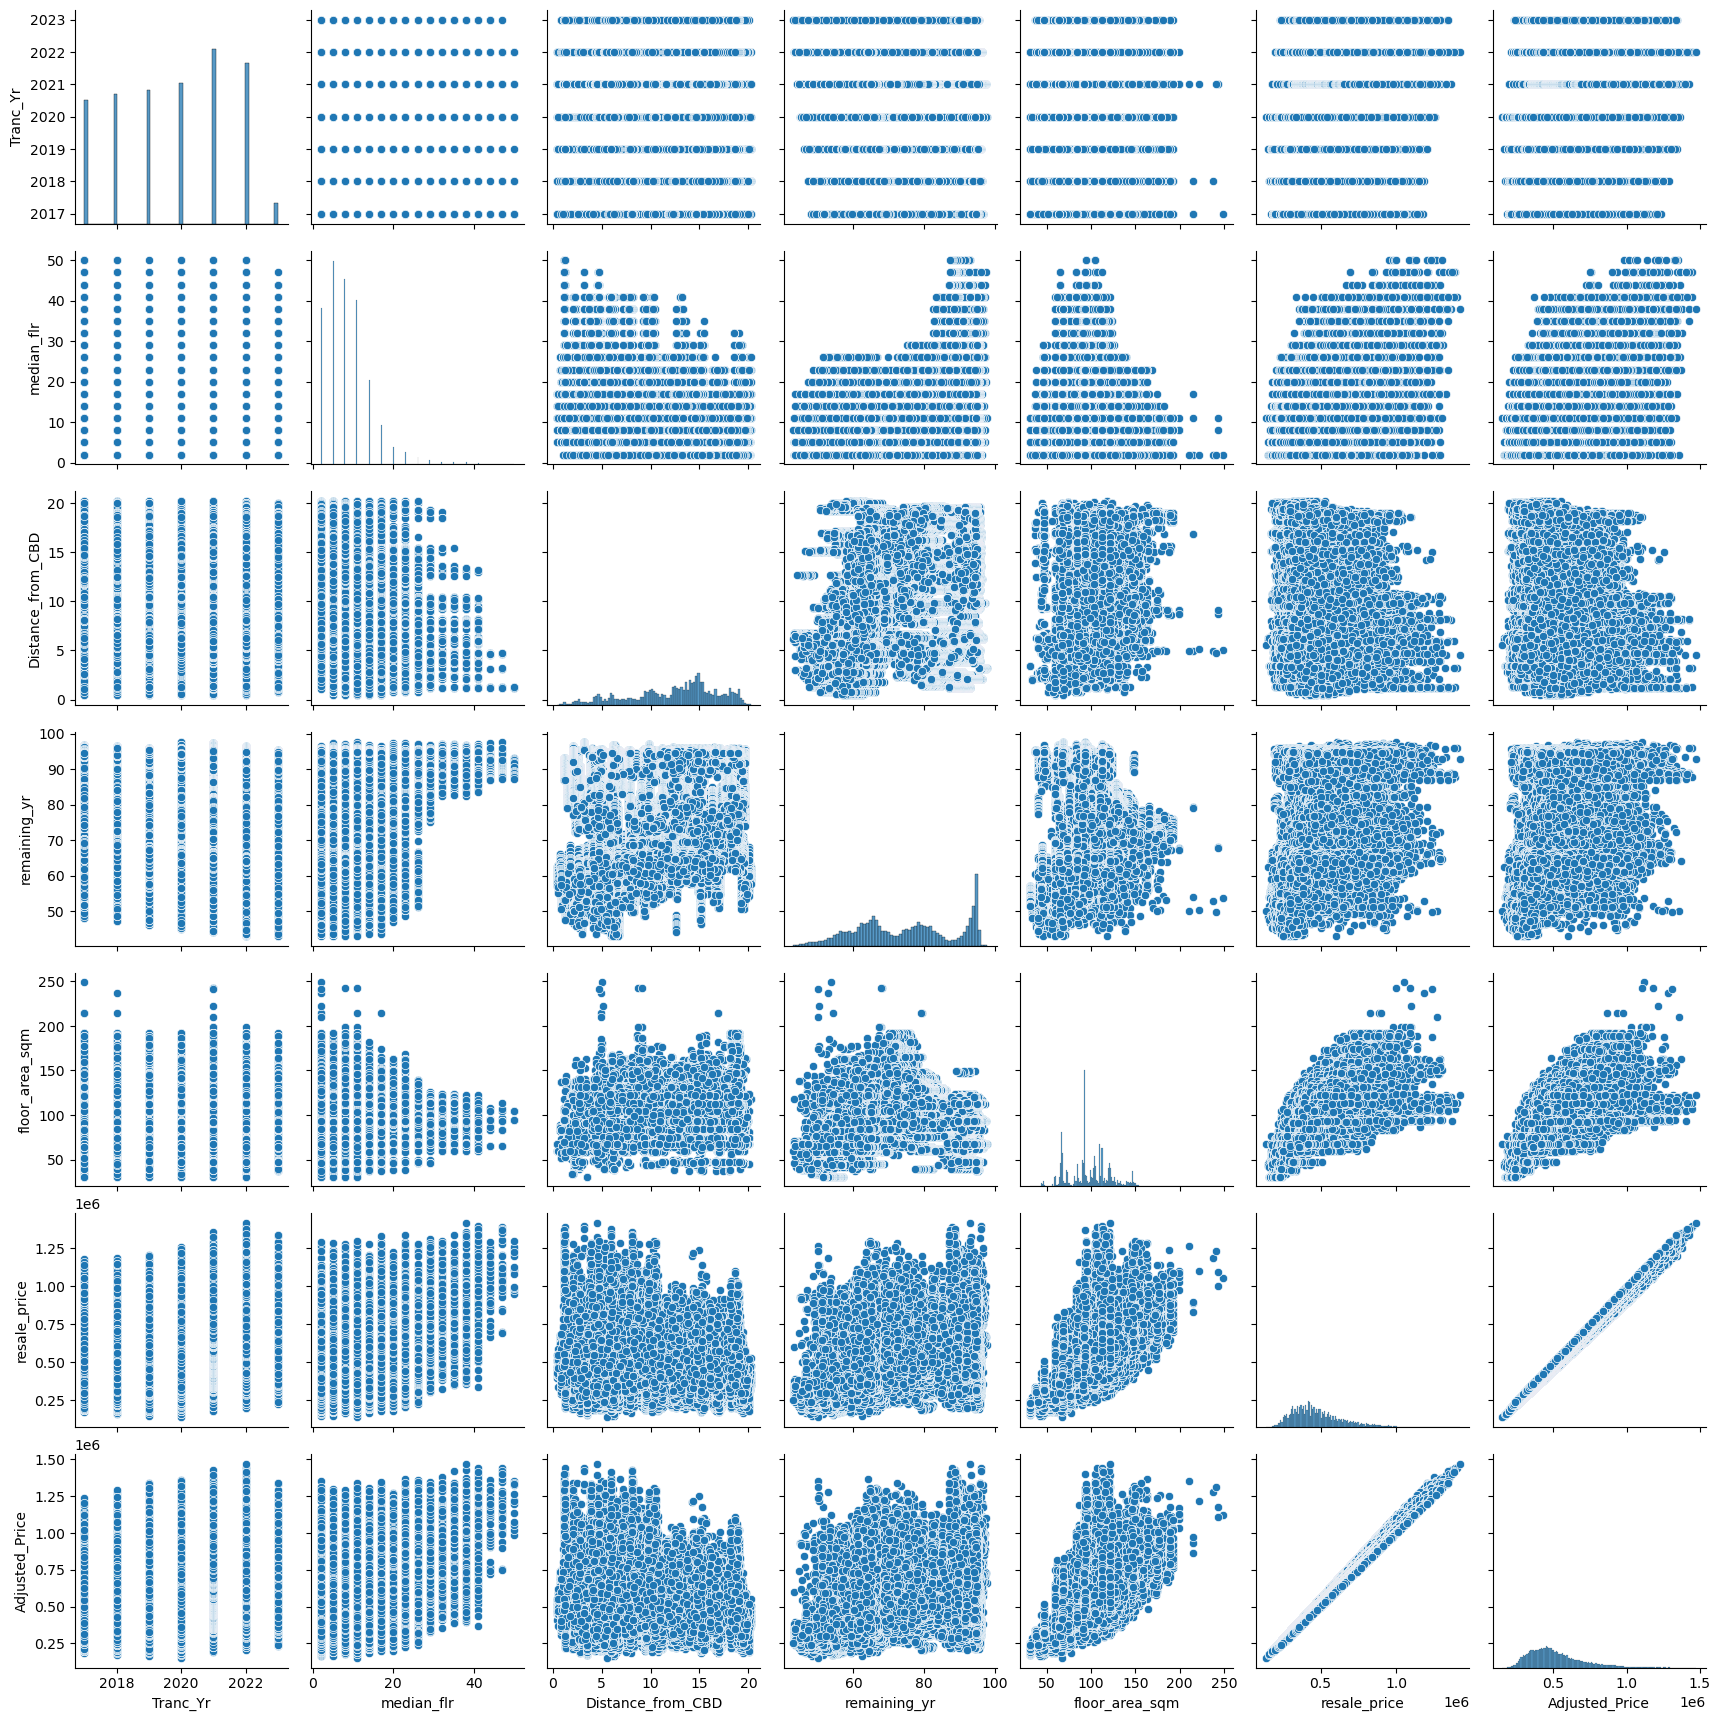

In [71]:
sns.pairplot(df_resale)
plt.show()

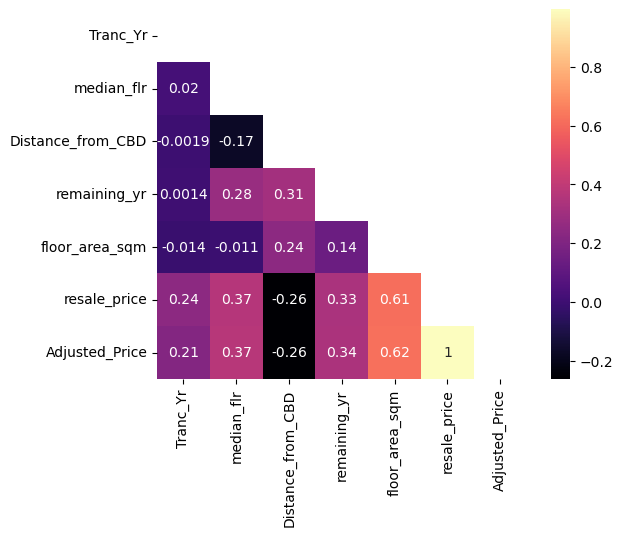

In [72]:
# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(df_resale.corr(), dtype=bool))

# Create the heatmap with the mask and square parameters
sns.heatmap(df_resale.corr(), cmap="magma", mask=mask, square=True, annot = True)

plt.show()

**Explanations:**

- Numeric features selected have some correlation with resale price. 
- Floor_area_sqm has the highest correlation. 
- The correlation is adjusted to 0.01 if we are using Adjusted_Price instead of resale_price for floor area sqm.
- Distance from CBD has an inverse correlation which is somewhat in line with the common belief that flats closest to the city are usually more expensive.
- It is also noted that flats are older in the city as compared to those further away. Newer towns are built later and further away from city. 
- This also explains why the resale price for flats nearer to CBD could be normalised as they are older and shorter lease as compared to those newer towns where the flats have longer remaining lease period.

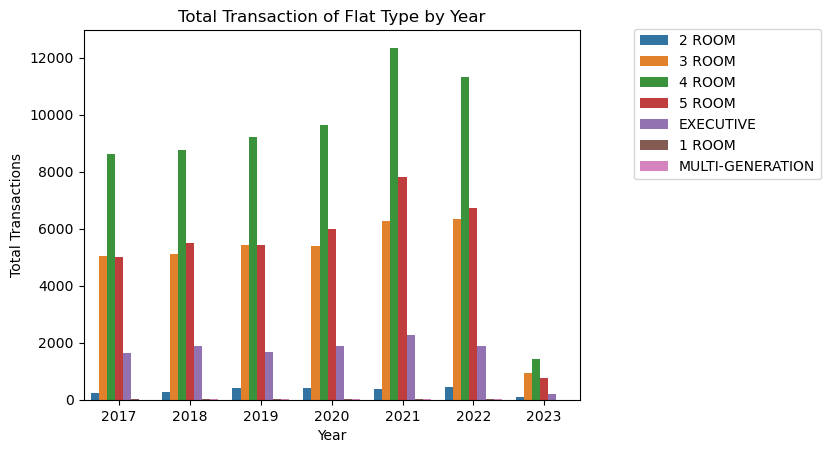

In [73]:
flat_type_count = sns.countplot(data=df_resale, x='Tranc_Yr', hue='flat_type')
flat_type_count.legend(loc='right', bbox_to_anchor=(1.5, 0.8), ncol=1)
plt.xlabel("Year")
plt.ylabel("Total Transactions")
plt.title("Total Transaction of Flat Type by Year")

plt.show()

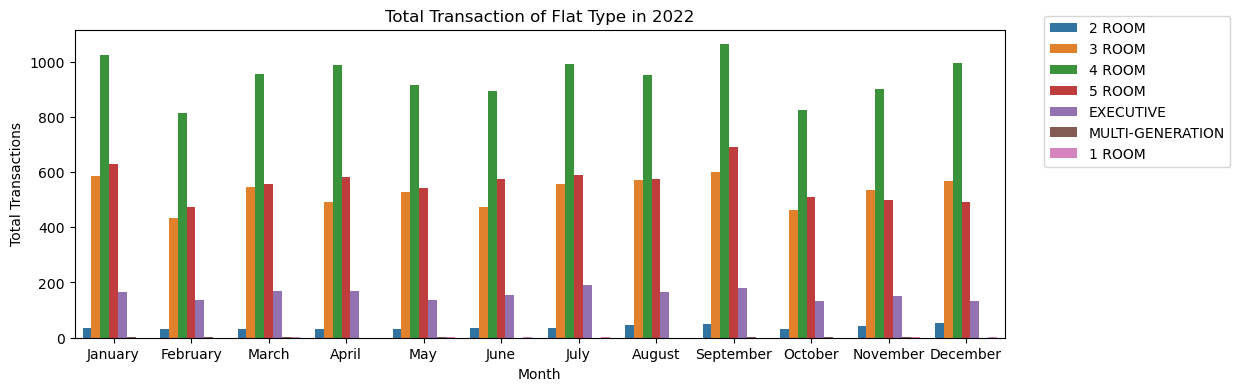

In [84]:
# Countplot of resale by month in the year 2022
plt.figure(figsize=(12,4))
sale_2022 = df_resale[df_resale['Tranc_Yr'] == 2022]
sale_2022_countplot = sns.countplot(data=sale_2022, x='Tranc_Mth', hue='flat_type')
sale_2022_countplot.legend(loc='right', bbox_to_anchor=(1.25, 0.8), ncol=1)
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.title("Total Transaction of Flat Type in 2022")

plt.show()

In [ ]:
yearly_avg_price = df_resale.groupby(['Tranc_Yr', 'flat_type'])['resale_price'].mean().round()
yearly_avg_price = pd.DataFrame(yearly_avg_price).reset_index()
yearly_avg_price

In [ ]:
yr_avg_price = sns.lineplot(data=yearly_avg_price, x='Tranc_Yr', y='resale_price', hue='flat_type')
yr_avg_price.legend(loc='right', bbox_to_anchor=(1.5, 0.8), ncol=1)
plt.xlabel("Year")
plt.ylabel("Resale Price")
plt.title("Average Resale Price of Flat Type by Year")

plt.show()

In [ ]:
flr_area_avgprice = df_resale.groupby(['floor_area_sqm', 'flat_type'])['resale_price'].mean().round()
flr_area_avgprice = pd.DataFrame(flr_area_avgprice).reset_index()
flr_area_avgprice

In [ ]:
yflr_area_price = sns.scatterplot(data=flr_area_avgprice, x='floor_area_sqm', y='resale_price', hue='flat_type')
yflr_area_price.legend(loc='right', bbox_to_anchor=(1.5, 0.8), ncol=1)
plt.xlabel("Floor Area by sqm")
plt.ylabel("Resale Price")
plt.title("Average Resale Price by Floor Area in sqm")

plt.show()

In general, the floor area per sqm is very much in line with the resale price. Those 3 to 5-Room flats that have bigger floor areas are the Terrace, Adjoined, Premium Loft models. These are unique models and the price range is usually higher than the common models.

Base on this scatter plot, a simple linear regression model will not be able to predict well as the flat models does shift the resale price from a normal regression line; creating a big price difference when we do prediction.

In [ ]:
# Creating a four room polynomial regplot
Four_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='4 ROOM']

four_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Four_flr_price, order=3)
plt.xlabel('Floor Area')
plt.ylabel('Resale Price')
four_room_poly.set_title('Polynomial Regression Plot of 4 ROOM Floor Area by Resale Price')
four_room_poly.title.set_position([0.6, 1.5])

plt.show()

In [ ]:
#create a 3 room polynomial regplot
Three_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='3 ROOM']

three_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Three_flr_price)
plt.xlabel('Floor Area')
plt.ylabel('Resale Price')
three_room_poly.set_title('Polynomial Regression Plot of 3 ROOM Floor Area by Resale Price')
three_room_poly.title.set_position([0.6, 1.5])

plt.show()

In [ ]:
### create a 5 room polynomial regplot
Five_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='5 ROOM']

five_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Five_flr_price, order=4)
plt.xlabel('Floor Area')
plt.ylabel('Resale Price')
five_room_poly.set_title('Polynomial Regression Plot of 5 ROOM Floor Area by Resale Price')
five_room_poly.title.set_position([0.6, 1.5])

plt.show()

**The question is: Will we overfit the regression model. The dilemma of variance reduction and increasing bias**

***What if we ceate a new feature - price_sqm? Will se see a better scatter plot?*** 

to be continued